# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [ ]:
####Findings from this analysis
# As we move closer to the equator, the temperature increases
# Cloudiness seems to be randonly dispersed across all latitidues 
# As we move closer to the equator, the humidity increases 

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [3]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

624

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [4]:
responses = []
lat = []
lon = []
temp = []
cloudiness = []
country = []
#date = []
humidity = []
wind_speed = []
url = "http://api.openweathermap.org/data/2.5/weather?units=imperial"
found_cities = []

for city in cities:
    query_url = url + "&appid=" + weather_api_key + "&q=" + city
    try:
        response = requests.get(query_url).json()
        lat.append(response['coord']['lat'])
        lon.append(response['coord']['lon'])
        responses.append(response)
        temp.append(response['main']['temp_max'])
        cloudiness.append(response['clouds']['all'])
        country.append(response['sys']['country'])
        humidity.append(response['main']['humidity'])
        wind_speed.append(response['wind']['speed'])
        found_cities.append(city)
        print(f"Making request for {city}")
    except: 
        print("City not found")
        pass



Making request for albany
Making request for houma
Making request for busselton
Making request for jamestown
Making request for ushuaia
Making request for hilo
Making request for lasa
Making request for yumen
Making request for rocha
Making request for mahebourg
Making request for qaanaaq
Making request for flin flon
Making request for tasiilaq
Making request for mar del plata
Making request for sterling
Making request for lubango
Making request for alakurtti
Making request for sanming
Making request for shetpe
Making request for mataura
Making request for rikitea
Making request for cabo san lucas
Making request for punta arenas
Making request for usinsk
Making request for aptos
Making request for puerto ayora
Making request for lundazi
Making request for lorengau
Making request for kahului
Making request for thinadhoo
Making request for bluff
Making request for yellowknife
Making request for sumbe
Making request for bambous virieux
Making request for joshimath
City not found
Making re

Making request for artesia
Making request for aykhal
Making request for ancud
Making request for san jose
Making request for muli
Making request for horn lake
Making request for acari
City not found
Making request for kindersley
Making request for tocopilla
City not found
Making request for manokwari
Making request for ilheus
Making request for kalemie
Making request for faya
Making request for moyale
Making request for naduvattam
Making request for sitka
Making request for dickinson
Making request for mugur-aksy
Making request for athmallik
Making request for zemio
Making request for clearwater
Making request for dalgopol
City not found
Making request for caala
Making request for ranau
Making request for havre-saint-pierre
Making request for daugavpils
Making request for anqiu
Making request for sar-e pul
Making request for santa marta
Making request for atar
Making request for general roca
City not found
Making request for mont-dore
Making request for porto santo
Making request for m

Making request for luena
Making request for bandarbeyla
Making request for rafaela
Making request for aloleng
Making request for curup
Making request for myitkyina
Making request for khartoum
Making request for wellington
Making request for burns lake
Making request for dongsheng
Making request for conceicao do araguaia
Making request for baghdad
Making request for pestovo
Making request for altamira


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [5]:
weather_df = pd.DataFrame({"City" : found_cities, "Temperature" : temp, "Latitude" : lat, "Wind Speed" : wind_speed, "Cloudiness" : cloudiness, "Country" : country, "Humidity" : humidity, "Max Temp" : temp, "Longitude" : lon})
weather_df
weather_df.to_csv('city_data', index=False)

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

Text(0.5, 0, 'Latitude')

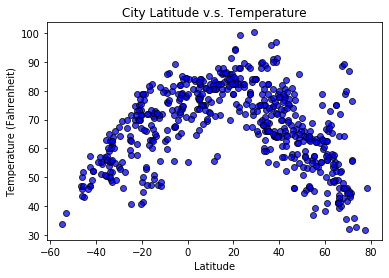

In [6]:
plt.scatter(lat, temp, marker="o", facecolors="blue", edgecolors="black", alpha=0.75)
plt.title("City Latitude v.s. Temperature")
plt.ylabel("Temperature (Fahrenheit)")
plt.xlabel("Latitude")

#### Latitude vs. Humidity Plot

Text(0.5, 0, 'Latitude')

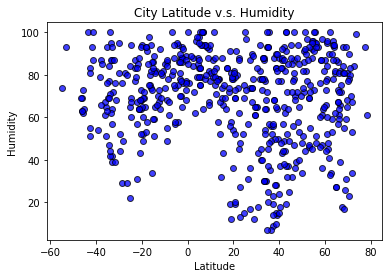

In [7]:
plt.scatter(lat, humidity, marker="o", facecolors="blue", edgecolors="black", alpha=0.75)
plt.title("City Latitude v.s. Humidity")
plt.ylabel("Humidity")
plt.xlabel("Latitude")

#### Latitude vs. Cloudiness Plot

Text(0.5, 0, 'Latitude')

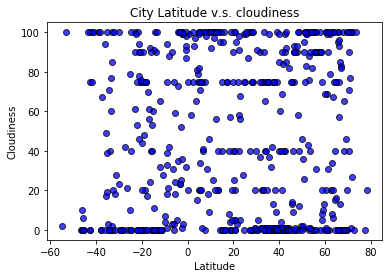

In [8]:
plt.scatter(lat, cloudiness, marker="o", facecolors="blue", edgecolors="black", alpha=0.75)
plt.title("City Latitude v.s. cloudiness")
plt.ylabel("Cloudiness")
plt.xlabel("Latitude")

#### Latitude vs. Wind Speed Plot

Text(0.5, 0, 'Latitude')

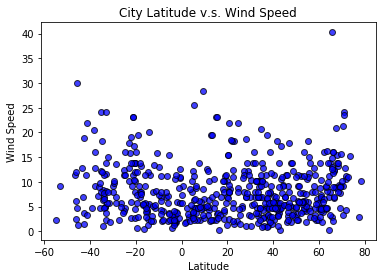

In [9]:
plt.scatter(lat, wind_speed, marker="o", facecolors="blue", edgecolors="black", alpha=0.75)
plt.title("City Latitude v.s. Wind Speed")
plt.ylabel("Wind Speed")
plt.xlabel("Latitude")

## Linear Regression

In [10]:
# OPTIONAL: Create a function to create Linear Regression plots


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

Text(6, 10, 'y = -0.48x + 87.27')

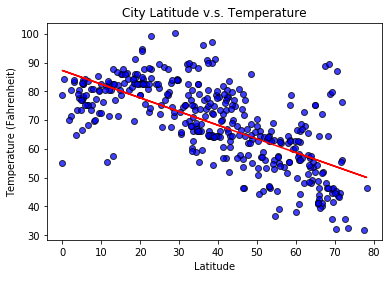

In [11]:
northern_hemisphere = weather_df.loc[weather_df["Latitude"] > 0]
northern_lat = northern_hemisphere["Latitude"]
northern_temp = northern_hemisphere["Temperature"]
plt.scatter(northern_lat, northern_temp, marker="o", facecolors="blue", edgecolors="black", alpha=0.75)
plt.title("City Latitude v.s. Temperature")
plt.ylabel("Temperature (Fahrenheit)")
plt.xlabel("Latitude")

(slope, intercept, rvalue, pvalue, stderr) = linregress(northern_lat, northern_temp)
regress_values = northern_lat * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(northern_lat,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

Text(6, 10, 'y = 0.64x + 77.79')

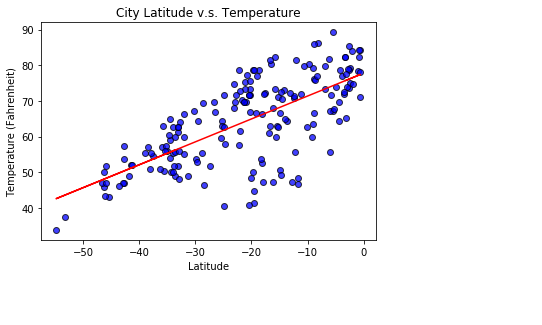

In [12]:
southern_hemisphere = weather_df.loc[weather_df["Latitude"] < 0]
southern_lat = southern_hemisphere["Latitude"]
southern_temp = southern_hemisphere["Temperature"]
plt.scatter(southern_lat, southern_temp, marker="o", facecolors="blue", edgecolors="black", alpha=0.75)
plt.title("City Latitude v.s. Temperature")
plt.ylabel("Temperature (Fahrenheit)")
plt.xlabel("Latitude")

(slope, intercept, rvalue, pvalue, stderr) = linregress(southern_lat, southern_temp)
regress_values = southern_lat * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(southern_lat,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

Text(6, 10, 'y = -0.11x + 72.07')

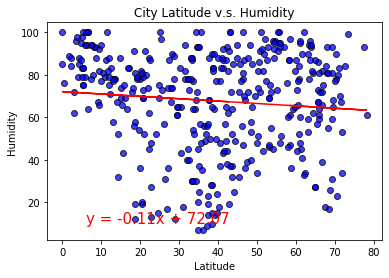

In [13]:
northern_lat = northern_hemisphere["Latitude"]
northern_humidity = northern_hemisphere["Humidity"]
plt.scatter(northern_lat, northern_humidity, marker="o", facecolors="blue", edgecolors="black", alpha=0.75)
plt.title("City Latitude v.s. Humidity")
plt.ylabel("Humidity")
plt.xlabel("Latitude")

(slope, intercept, rvalue, pvalue, stderr) = linregress(northern_lat, northern_humidity)
regress_values = northern_lat * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(northern_lat,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

Text(6, 10, 'y = 0.21x + 77.15')

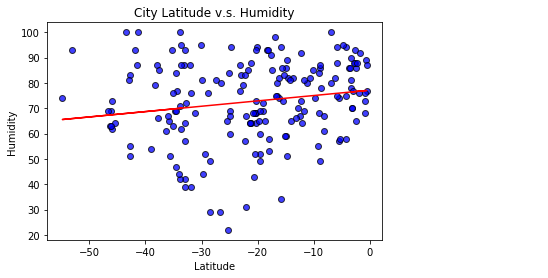

In [15]:
southern_lat = southern_hemisphere["Latitude"]
southern_humidity = southern_hemisphere["Humidity"]
plt.scatter(southern_lat, southern_humidity, marker="o", facecolors="blue", edgecolors="black", alpha=0.75)
plt.title("City Latitude v.s. Humidity")
plt.ylabel("Humidity")
plt.xlabel("Latitude")

(slope, intercept, rvalue, pvalue, stderr) = linregress(southern_lat, southern_humidity)
regress_values = southern_lat * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(southern_lat,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

Text(6, 10, 'y = -0.13x + 52.75')

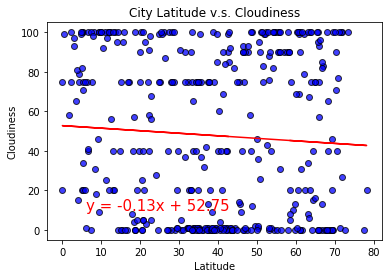

In [16]:
northern_lat = northern_hemisphere["Latitude"]
northern_cloudiness = northern_hemisphere["Cloudiness"]
plt.scatter(northern_lat, northern_cloudiness, marker="o", facecolors="blue", edgecolors="black", alpha=0.75)
plt.title("City Latitude v.s. Cloudiness")
plt.ylabel("Cloudiness")
plt.xlabel("Latitude")

(slope, intercept, rvalue, pvalue, stderr) = linregress(northern_lat, northern_cloudiness)
regress_values = northern_lat * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(northern_lat,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

Text(6, 10, 'y = 0.5x + 52.48')

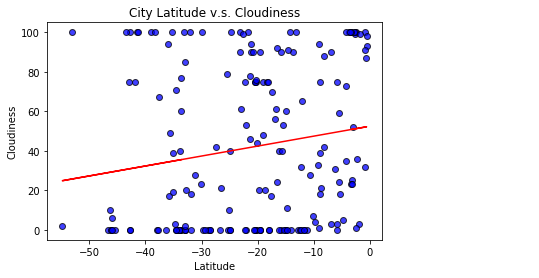

In [19]:
southern_lat = southern_hemisphere["Latitude"]
southern_cloudiness = southern_hemisphere["Cloudiness"]
plt.scatter(southern_lat, southern_cloudiness, marker="o", facecolors="blue", edgecolors="black", alpha=0.75)
plt.title("City Latitude v.s. Cloudiness")
plt.ylabel("Cloudiness")
plt.xlabel("Latitude")

(slope, intercept, rvalue, pvalue, stderr) = linregress(southern_lat, southern_cloudiness)
regress_values = southern_lat * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(southern_lat,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

Text(6, 10, 'y = 0.03x + 6.52')

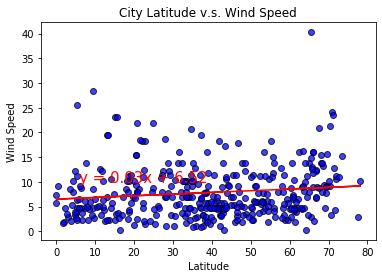

In [22]:
northern_lat = northern_hemisphere["Latitude"]
northern_wind = northern_hemisphere["Wind Speed"]
plt.scatter(northern_lat, northern_wind, marker="o", facecolors="blue", edgecolors="black", alpha=0.75)
plt.title("City Latitude v.s. Wind Speed")
plt.ylabel("Wind Speed")
plt.xlabel("Latitude")

(slope, intercept, rvalue, pvalue, stderr) = linregress(northern_lat, northern_wind)
regress_values = northern_lat * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(northern_lat,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

Text(6, 10, 'y = -0.11x + 5.93')

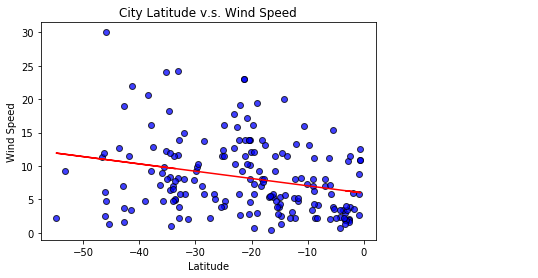

In [25]:
southern_lat = southern_hemisphere["Latitude"]
southern_wind = southern_hemisphere["Wind Speed"]
plt.scatter(southern_lat, southern_wind, marker="o", facecolors="blue", edgecolors="black", alpha=0.75)
plt.title("City Latitude v.s. Wind Speed")
plt.ylabel("Wind Speed")
plt.xlabel("Latitude")

(slope, intercept, rvalue, pvalue, stderr) = linregress(southern_lat, southern_wind)
regress_values = southern_lat * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(southern_lat,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")